In [41]:
# To help with reading and manipulation of data
import numpy as np
import pandas as pd

# # To help with data visualization
# import matplotlib.pyplot as plt
# import seaborn as sns

# To split the data
from sklearn.model_selection import train_test_split

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# # To impute missing values
# from sklearn.impute import SimpleImputer

# # To build a Random forest classifier
# from sklearn.ensemble import RandomForestClassifier

# # To tune a model
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

# # To suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./Cardiac.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    object
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

In [5]:
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,Male,1,1,0,1,0,0,0,1,0,0,0,no
1,Male,0,1,0,1,0,0,0,1,0,0,0,no
2,Male,0,1,0,1,0,0,0,1,0,0,0,no
3,Male,0,1,0,1,0,0,0,1,0,0,0,no
4,Male,0,0,0,0,0,1,1,0,0,0,0,no


In [7]:
# identify percentage of Risk and No Risk
df["UnderRisk"].value_counts(normalize=True)

UnderRisk
no     0.786277
yes    0.213723
Name: proportion, dtype: float64

In [22]:
df["UnderRisk"].replace({"Yes": 1, "No": 0}, inplace=True)

X = df.drop("UnderRisk", axis=1)
y = df["UnderRisk"]


# split the data into train and test
X_temp, X_test, Y_temp, y_test = train_test_split(
    X,y, test_size=0.2, random_state=1,stratify=y
)

# split the train data into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, Y_temp, test_size=0.25, random_state=1,stratify=Y_temp
)
 
 #create dummy variables
X_train = pd.get_dummies(X_train,drop_first=True)
X_val = pd.get_dummies(X_val,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)

# print the shape of the train and validation data
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(533, 13)
(178, 13)
(178, 13)


In [23]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train )

LogisticRegression()

In [28]:
# Check the performance of the model on train set
y_pred = logreg.predict(X_train)
print("Accuracy of logistic regression classifier on train set: {:.2f}".format(accuracy_score(y_train, y_pred)))
print("Recall of logistic regression classifier on train set: {:.2f}".format(recall_score(y_train, y_pred, pos_label='yes')))
print("Precision of logistic regression classifier on train set: {:.2f}".format(precision_score(y_train, y_pred, pos_label='yes')))
print("F1 of logistic regression classifier on train set: {:.2f}".format(f1_score(y_train, y_pred, pos_label='yes')))

Accuracy of logistic regression classifier on train set: 0.79
Recall of logistic regression classifier on train set: 0.04
Precision of logistic regression classifier on train set: 0.57
F1 of logistic regression classifier on train set: 0.07


In [30]:
# smote to handle imbalanced data
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)

   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   ------ -------------------------------- 41.0/257.7 kB 487.6 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/257.7 kB 930.9 kB/s eta 0:00:01
   ---------------------------------------  256.0/257.7 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 257.7/257.7 kB 1.4 MB/s eta 0:00:00


In [48]:
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

#print the shape of the train and validation data
print(X_train_over.shape)
print(y_train_over.shape)


logreg2 = LogisticRegression()
logreg2.fit(X_train_over, y_train_over)

# Check the performance of the model on validation set
y_pred = logreg2.predict(X_val)
print("Accuracy of logistic regression classifier on validation set: {:.2f}".format(accuracy_score(y_val, y_pred)))
print("Recall of logistic regression classifier on validation set: {:.2f}".format(recall_score(y_val, y_pred, pos_label='yes')))
print("Precision of logistic regression classifier on validation set: {:.2f}".format(precision_score(y_val, y_pred, pos_label='yes')))
print("F1 of logistic regression classifier on validation set: {:.2f}".format(f1_score(y_val, y_pred, pos_label='yes')))
print("Confusion matrix of logistic regression classifier on validation set: \n",confusion_matrix(y_val, y_pred))

(838, 13)
(838,)
Accuracy of logistic regression classifier on validation set: 0.60
Recall of logistic regression classifier on validation set: 0.63
Precision of logistic regression classifier on validation set: 0.30
F1 of logistic regression classifier on validation set: 0.40
Confusion matrix of logistic regression classifier on validation set: 
 [[83 57]
 [14 24]]


In [39]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

# Check the performance of the model on Train set\
y_pred = rf.predict(X_train)
print("Accuracy of random forest classifier on train set: {:.2f}".format(accuracy_score(y_train, y_pred)))
print("Recall of random forest classifier on train set: {:.2f}".format(recall_score(y_train, y_pred, pos_label='yes')))
print("Precision of random forest classifier on train set: {:.2f}".format(precision_score(y_train, y_pred, pos_label='yes')))
print("F1 of random forest classifier on train set: {:.2f}".format(f1_score(y_train, y_pred, pos_label='yes')))
print("Confusion matrix of random forest classifier on train set: \n",confusion_matrix(y_train, y_pred))

print("True positives: ",confusion_matrix(y_train, y_pred)[1,1])


Accuracy of random forest classifier on train set: 0.80
Recall of random forest classifier on train set: 0.18
Precision of random forest classifier on train set: 0.62
F1 of random forest classifier on train set: 0.27
Confusion matrix of random forest classifier on train set: 
 [[407  12]
 [ 94  20]]
True positives:  20


In [57]:
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

y_train_over.replace({"yes": 1, "no": 0}, inplace=True)

#print the shape of the train and validation data
print(X_train_over.shape)
print(y_train_over.shape)


# random forest classifier
model = RandomForestClassifier(random_state=1)

# cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

scoring = "recall"

kfold = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)  # 5-fold cross validation

results = cross_val_score(estimator=model, X=X_train_over, y=y_train_over, cv=kfold, scoring=scoring)

print(results)
 

(838, 13)
(838,)
[0.77380952 0.80952381 0.67857143 0.75903614 0.83333333]


In [58]:
y_train_over.replace({"yes": 1, "no": 0}, inplace=True)

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# create a function to build the models

def build_model(model_name):
    if model_name == "BaggingClassifier":
        model = BaggingClassifier(random_state=1)
    elif model_name == "RandomForestClassifier":
        model = RandomForestClassifier(random_state=1)
    elif model_name == "LogisticRegression":
        model = LogisticRegression(random_state=1)
    elif model_name == "DecisionTreeClassifier":
        model = DecisionTreeClassifier(random_state=1)
    else:
        print("Please select a model from the list")
        return None
    #model.fit(X_train_over, y_train_over)
    return model

models = [ "BaggingClassifier" , "RandomForestClassifier" , "LogisticRegression" , "DecisionTreeClassifier"  ]
# build the models
for model_name in models:
    model = build_model(model_name)
   # y_pred = model.predict(X_train_over)

    # cross validation
    from sklearn.model_selection import cross_val_score
    scoring = "recall"

    kfold = StratifiedKFold(

        n_splits=5, shuffle=True, random_state=1

    )  # Setting number of splits equal to 5

    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    
    print("Mean of cross validation scores for {} is: {}".format(model_name, cv_result.mean() ))
    # print("Standard deviation of cross validation scores for {} is: {}".format(model_name, cv_result.std()))
    # print("Recall of {} on train set: {:.2f}".format(model_name, recall_score(y_train, y_pred, pos_label='yes')))
    # print("Accuracy of {} on train set: {:.2f}".format(model_name, accuracy_score(y_train, y_pred)))
    # print("Precision of {} on train set: {:.2f}".format(model_name, precision_score(y_train, y_pred, pos_label='yes')))
    # print("F1 of {} on train set: {:.2f}".format(model_name, f1_score(y_train, y_pred, pos_label='yes')))
    # print("Confusion matrix of {} on train set: \n".format(model_name),confusion_matrix(y_train, y_pred))


    

Mean of cross validation scores for BaggingClassifier is: 0.7684452094090648
Mean of cross validation scores for RandomForestClassifier is: 0.7708548479632817
Mean of cross validation scores for LogisticRegression is: 0.7613310384394723
Mean of cross validation scores for DecisionTreeClassifier is: 0.7684452094090648


In [61]:
# build the models with hyperparameter tuning with ada boost classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

model = AdaBoostClassifier(random_state=1)

# create a function to build the models
param_grid = {

    "n_estimators": np.arange(10, 110, 10),

    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],

    "base_estimator": [

        DecisionTreeClassifier(max_depth=1, random_state=1),

        DecisionTreeClassifier(max_depth=2, random_state=1),

        DecisionTreeClassifier(max_depth=3, random_state=1),

    ],

}

# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(metrics.recall_score)

randomized_cv = RandomizedSearchCV(

    estimator=model,

    param_distributions=param_grid,

    n_jobs=-1,

    n_iter=50,

    scoring=scorer,

    cv=5,

    random_state=1,

)

randomized_cv.fit(X_train_over, y_train_over)
 
 
 

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'base_estimator': [DecisionTreeClassifier(max_depth=1,
                                                                                  random_state=1),
                                                           DecisionTreeClassifier(max_depth=2,
                                                                                  random_state=1),
                                                           DecisionTreeClassifier(max_depth=3,
                                                                                  random_state=1)],
                                        'learning_rate': [0.1, 0.01, 0.2, 0.05,
                                                          1],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=1, scoring=make_scorer(recall_score))

In [62]:
randomized_cv.best_params_

{'n_estimators': 70,
 'learning_rate': 0.01,
 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)}

In [66]:
 # undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# ada boost classifier
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=1)



model.fit(X_train_over, y_train_over)

# Check the performance of the model on Train set
y_pred = model.predict(X_train_over)
print("Accuracy of AdaBoost classifier on train set: {:.2f}".format(accuracy_score(y_train_over, y_pred)))
print("Recall of AdaBoost classifier on train set: {:.2f}".format(recall_score(y_train_over, y_pred)))
print("Precision of AdaBoost classifier on train set: {:.2f}".format(precision_score(y_train_over, y_pred)))
print("F1 of AdaBoost classifier on train set: {:.2f}".format(f1_score(y_train_over, y_pred)))
print("Confusion matrix of AdaBoost classifier on train set: \n",confusion_matrix(y_train_over, y_pred))




# cross validation
model.fit(X_train_under, y_train_under)

# Check the performance of the model on Train set
y_pred = model.predict(X_train_under)
print("Accuracy of AdaBoost classifier on train set: {:.2f}".format(accuracy_score(y_train_under, y_pred)))
print("Recall of AdaBoost classifier on train set: {:.2f}".format(recall_score(y_train_under, y_pred, pos_label='yes')))
print("Precision of AdaBoost classifier on train set: {:.2f}".format(precision_score(y_train_under, y_pred, pos_label='yes')))
print("F1 of AdaBoost classifier on train set: {:.2f}".format(f1_score(y_train_under, y_pred, pos_label='yes')))
print("Confusion matrix of AdaBoost classifier on train set: \n",confusion_matrix(y_train_under, y_pred))

# Important features
feature_importance = pd.DataFrame(
    {"feature": X_train.columns, "importance": model.feature_importances_}
)



Accuracy of AdaBoost classifier on train set: 0.67
Recall of AdaBoost classifier on train set: 0.78
Precision of AdaBoost classifier on train set: 0.64
F1 of AdaBoost classifier on train set: 0.70
Confusion matrix of AdaBoost classifier on train set: 
 [[232 187]
 [ 93 326]]
Accuracy of AdaBoost classifier on train set: 0.71
Recall of AdaBoost classifier on train set: 0.84
Precision of AdaBoost classifier on train set: 0.66
F1 of AdaBoost classifier on train set: 0.74
Confusion matrix of AdaBoost classifier on train set: 
 [[65 49]
 [18 96]]


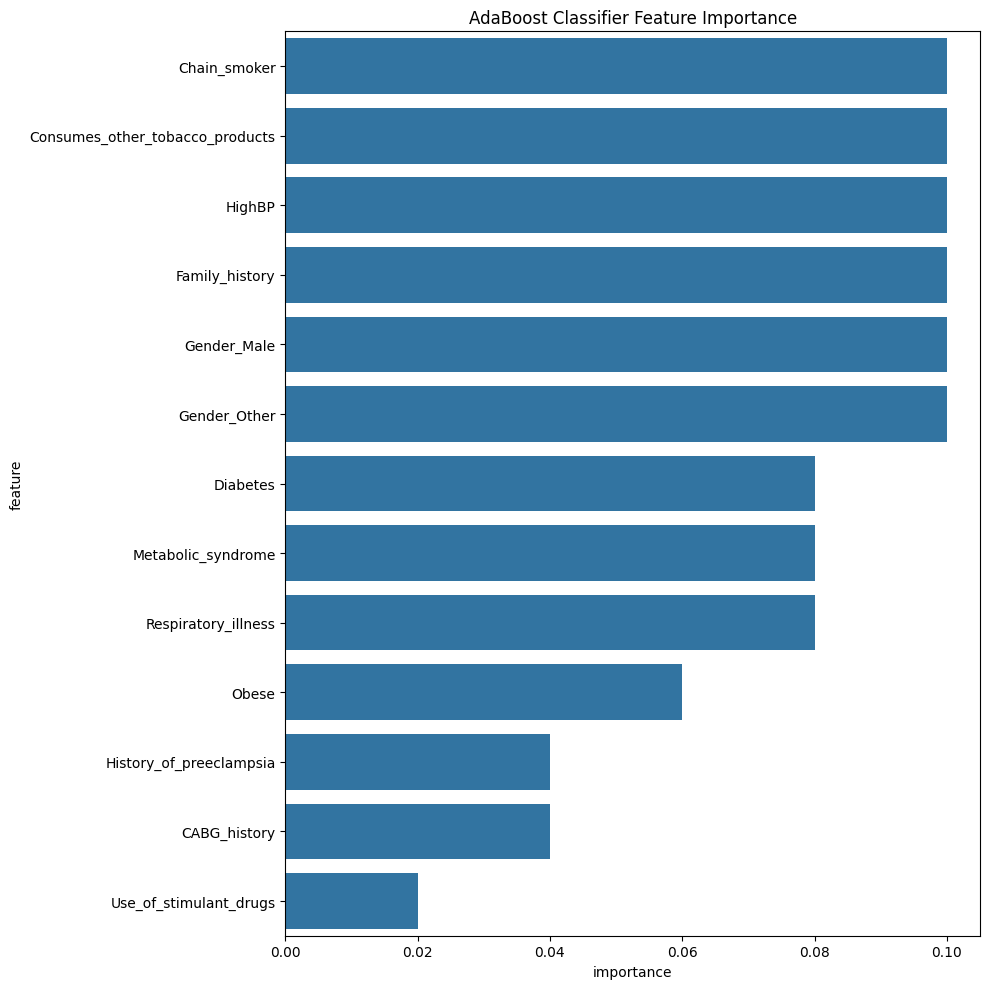

In [68]:
# Plot the count plot for feature importance
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.barplot(
    x="importance", y="feature", data=feature_importance.sort_values(by="importance", ascending=False)
)
plt.title("AdaBoost Classifier Feature Importance")
plt.tight_layout()
plt.show()
